Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.image as mpimg
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images

trainpath='/content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
testpath='/content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/'
data_dir_train = pathlib.Path(trainpath)
data_dir_test = pathlib.Path(testpath)

In [6]:
# getting the train an test image counts
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
#if rerun required, clean output from augmentation
for f in glob(trainpath+"*/output/*.jpg"):
    os.remove(f)

Use 80% of the images for training, and 20% for validation.

**Create Train Dataset**

In [9]:

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, label_mode='categorical', image_size=(img_height,img_width
    ), class_names=None, color_mode='rgb', batch_size=32,labels='inferred',
    validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False,shuffle=True,  smart_resize=False
)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


**Create Test Dataset**

In [10]:

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, label_mode='categorical', image_size=(img_height,img_width
    ), class_names=None, color_mode='rgb', batch_size=32,labels='inferred',
    validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False,shuffle=True,  smart_resize=False
)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


In [11]:
#Displaying unique list of all classes.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data - one instance of all the nine classes present in the dataset

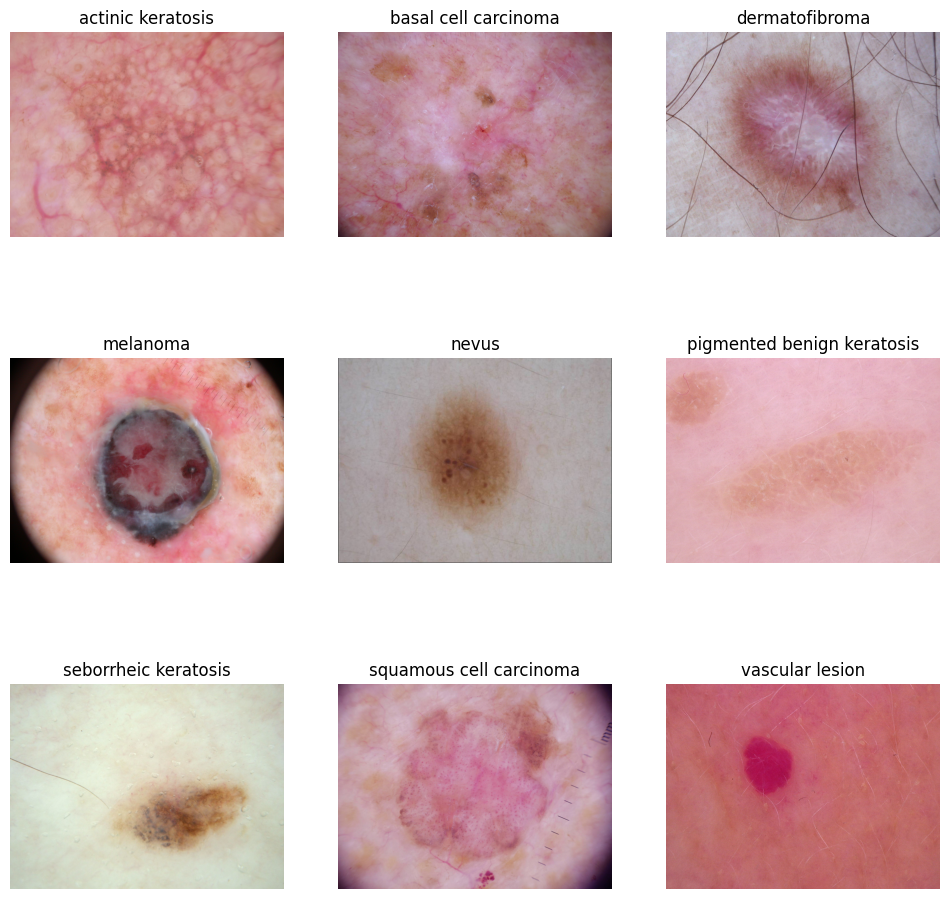

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for i in range(len(class_names)):
    image=mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.subplot(3,3,i+1)
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [13]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32, 9)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model1

### Create the model - to detect 9 classes present in the dataset.

In [15]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(offset=0.0,scale=1./255.,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### Compile the model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 275s 1s/step - loss: 3.4279 - accuracy: 0.1983 - val_loss: 2.1385 - val_accuracy: 0.2472
Epoch 2/20
57/57 [==============================] - 3s 49ms/step - loss: 1.9648 - accuracy: 0.2733 - val_loss: 1.8920 - val_accuracy: 0.3096
Epoch 3/20
57/57 [==============================] - 3s 48ms/step - loss: 1.7778 - accuracy: 0.3461 - val_loss: 1.7073 - val_accuracy: 0.4120
Epoch 4/20
57/57 [==============================] - 3s 50ms/step - loss: 1.6527 - accuracy: 0.4217 - val_loss: 1.7322 - val_accuracy: 0.3675
Epoch 5/20
57/57 [==============================] - 3s 49ms/step - loss: 1.5047 - accuracy: 0.4667 - val_loss: 1.6217 - val_accuracy: 0.4143
Epoch 6/20
57/57 [==============================] - 3s 49ms/step - loss: 1.4300 - accuracy: 0.5044 - val_loss: 1.4677 - val_accuracy: 0.4655
Epoch 7/20
57/57 [==============================] - 3s 50ms/step - loss: 1.3313 - accuracy: 0.5383 - val_loss: 1.3974 - val_accuracy: 0.4900
Epoch 8/20
57

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

### Visualizing training results

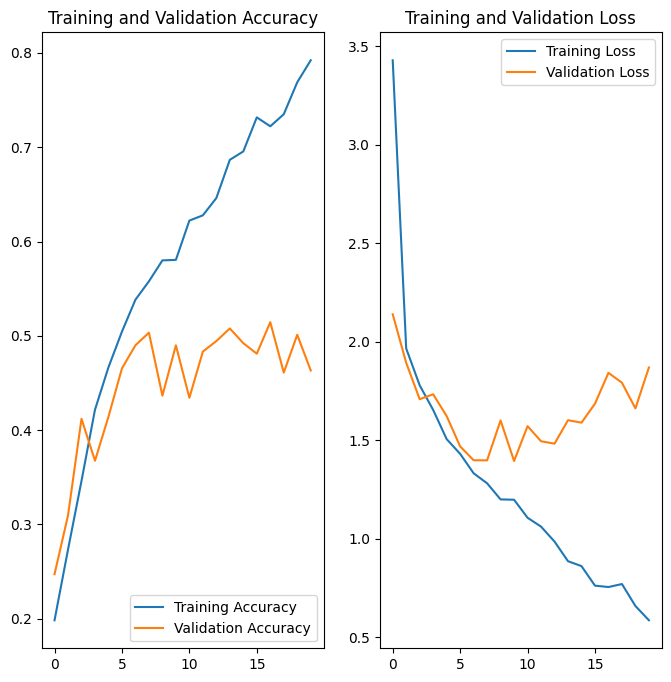

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write your findings here
1. While the training accuracy shows around 79%, testing accuracy is around 46%
2. While the training loss is reducing, testing loss is around 1.59
3. Looks like we have overfitting as training accuracy is good and validation accuracy is low.
4. Lets try increasing the dropout value and increase the number of convolution layers.

## Model2

### Create the model

In [20]:
model_1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(offset=0.0,scale=1./255.,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(64,(3,3),padding='same',activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(128,(3,3),padding='same',activation='relu'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### Compiling the model

In [21]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [22]:
epochs = 20
history = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 13s 130ms/step - loss: 2.0869 - accuracy: 0.1983 - val_loss: 2.0221 - val_accuracy: 0.1915
Epoch 2/20
57/57 [==============================] - 6s 106ms/step - loss: 1.9520 - accuracy: 0.2661 - val_loss: 1.8525 - val_accuracy: 0.3118
Epoch 3/20
57/57 [==============================] - 6s 107ms/step - loss: 1.8458 - accuracy: 0.3161 - val_loss: 1.7849 - val_accuracy: 0.3363
Epoch 4/20
57/57 [==============================] - 6s 108ms/step - loss: 1.7214 - accuracy: 0.3728 - val_loss: 1.6631 - val_accuracy: 0.3831
Epoch 5/20
57/57 [==============================] - 6s 107ms/step - loss: 1.6746 - accuracy: 0.3789 - val_loss: 1.6542 - val_accuracy: 0.3831
Epoch 6/20
57/57 [==============================] - 6s 109ms/step - loss: 1.6469 - accuracy: 0.3978 - val_loss: 1.6519 - val_accuracy: 0.3786
Epoch 7/20
57/57 [==============================] - 6s 108ms/step - loss: 1.6020 - accuracy: 0.4261 - val_loss: 1.5820 - val_accuracy: 0.3853
Epoch

### Visualizing the results

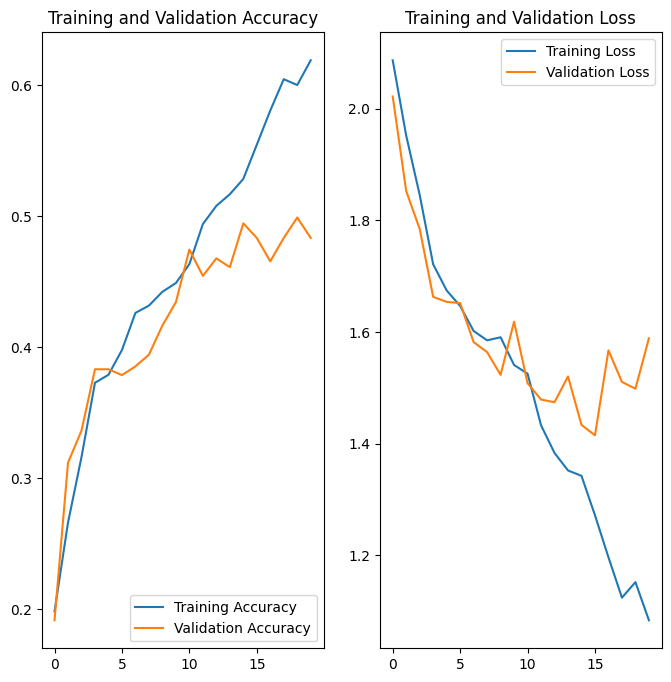

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings here
1. Training accuracy is 62% and validation accuracy is around 48%. Training accuracy reduced as the dropout increased.
2. Training loss is 1.08 and validation loss is 1.58.
3. The gap between training and validation accuracy is reduced. Its little overfitting and the accuracy is reduced.

Lets try data augmentation.

### Data Augmentation

In [24]:
#Specifying the augmentation
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
#checking the normalized values
normalization_layer=tf.keras.layers.Rescaling(1./255.)
normalizedds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image, label = next(iter(normalizedds))
firstimage=image[0]
print(np.min(firstimage),np.max(firstimage))
# The values are between 0 and 1

0.0 0.99003315


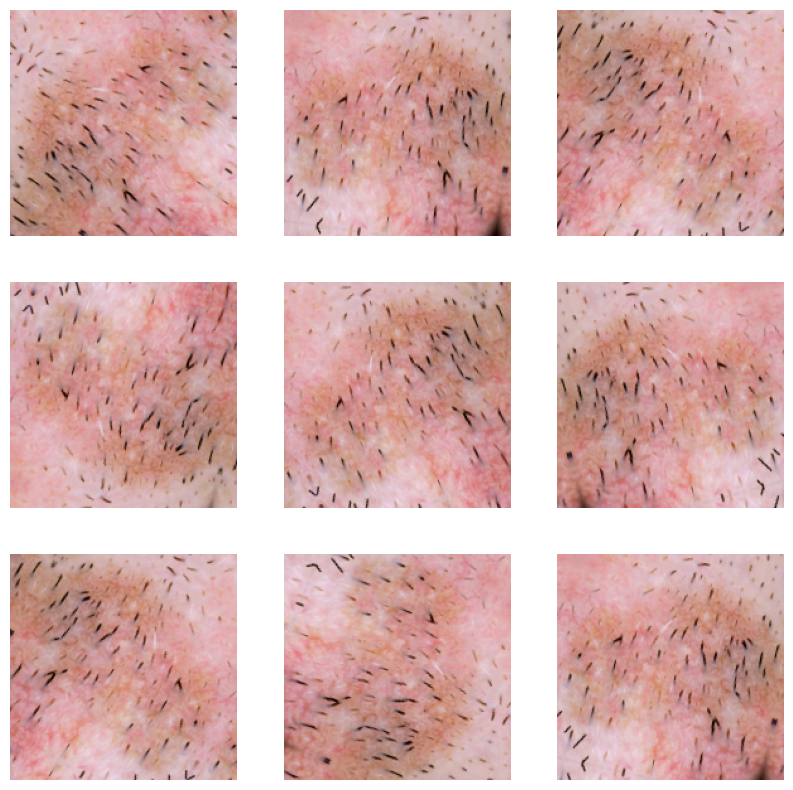

In [26]:
#Visualizing the augmented data

image=tf.cast(tf.expand_dims(firstimage,0),tf.float32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis('off')

## Model 3 : with augmentation
### Create the model


In [27]:

model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(offset=0.0,scale=1./255., ),
    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

### Compiling the model

In [28]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [29]:
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 10s 116ms/step - loss: 2.1341 - accuracy: 0.2072 - val_loss: 2.0616 - val_accuracy: 0.1960
Epoch 2/20
57/57 [==============================] - 6s 109ms/step - loss: 2.0373 - accuracy: 0.2133 - val_loss: 2.0336 - val_accuracy: 0.1960
Epoch 3/20
57/57 [==============================] - 6s 109ms/step - loss: 1.9774 - accuracy: 0.2656 - val_loss: 1.8431 - val_accuracy: 0.3608
Epoch 4/20
57/57 [==============================] - 6s 110ms/step - loss: 1.7939 - accuracy: 0.3450 - val_loss: 1.7356 - val_accuracy: 0.3586
Epoch 5/20
57/57 [==============================] - 6s 112ms/step - loss: 1.7061 - accuracy: 0.3917 - val_loss: 1.7277 - val_accuracy: 0.3764
Epoch 6/20
57/57 [==============================] - 6s 110ms/step - loss: 1.6682 - accuracy: 0.3989 - val_loss: 1.7083 - val_accuracy: 0.3541
Epoch 7/20
57/57 [==============================] - 7s 115ms/step - loss: 1.6639 - accuracy: 0.4083 - val_loss: 1.6111 - val_accuracy: 0.4209
Epoch

### Visualizing the results

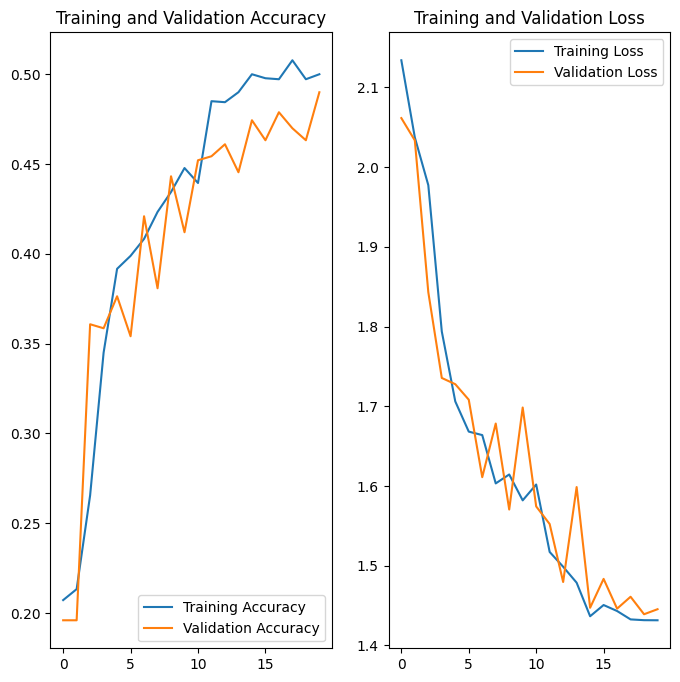

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

1. Training accuracy is reduced to 50% and valiation accuracy is almost same as before i.e., 49%.
2. Training loss is increased and the valiation loss is same as before.
3. There is underfitting.

Lets see the class distribution. If there is any imbalance, lets try to fix it, train the model and check the accuracy & loss again.

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [31]:
## Identifying distribution of classes in the training dataset
dict_names={}
for i in range(len(class_names)):
    dict_names[class_names[i]]=len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))
    print(class_names[i], ' has ',dict_names[class_names[i]],' samples.')

actinic keratosis  has  114  samples.
basal cell carcinoma  has  376  samples.
dermatofibroma  has  95  samples.
melanoma  has  448  samples.
nevus  has  357  samples.
pigmented benign keratosis  has  462  samples.
seborrheic keratosis  has  77  samples.
squamous cell carcinoma  has  181  samples.
vascular lesion  has  139  samples.


#### **Observations**:

Every class has varied number of samples.
There is lot of class imbalance that need to be rectified.
We will use Augmentor to reduce the imbalance.

#### - Which class has the least number of samples?
seborrheic keratosis has least numbers with 77 samples.

#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis class dominates the data with 462 samples.

#### **Rectify the class imbalance using Augmentor**
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset=trainpath

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x784252092140>: 100%|██████████| 500/500 [00:17<00:00, 28.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7842520DFA30>: 100%|██████████| 500/500 [00:17<00:00, 28.69 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78425202FDC0>: 100%|██████████| 500/500 [00:18<00:00, 27.01 Samples/s]


Initialised with 448 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x78426CBA4EE0>: 100%|██████████| 500/500 [01:23<00:00,  5.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x78426C0A6EC0>: 100%|██████████| 500/500 [01:13<00:00,  6.84 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78426F0A1510>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78426D4E5B40>: 100%|██████████| 500/500 [00:36<00:00, 13.59 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78426C0A6EC0>: 100%|██████████| 500/500 [00:16<00:00, 30.51 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN Assignment/CNN Assignment/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78426D90CD90>: 100%|██████████| 500/500 [00:18<00:00, 26.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [39]:
df2['Label'].value_counts()

dermatofibroma                500
nevus                         500
seborrheic keratosis          500
pigmented benign keratosis    500
squamous cell carcinoma       500
melanoma                      500
basal cell carcinoma          500
actinic keratosis             500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

From the above, class imbalance is reduced using augmentor. Lets try to create, train the model an check the accuracy.

#### Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180


#### Create a training dataset

In [41]:
data_dir_train=trainpath
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


#### **Create a validation dataset**

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical')

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


### **Model 4: post handling class imbalance**
#### Create model

In [43]:
model_augmentor=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(offset=0.0,scale=1./255.,),

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Conv2D(64,(3,3),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(9, activation='softmax')
])

#### Compile model

In [44]:
model_augmentor.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Train model

In [45]:
epochs = 30

history = model_augmentor.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 222ms/step - loss: 2.0546 - accuracy: 0.2681 - val_loss: 1.5275 - val_accuracy: 0.4292
Epoch 2/30
169/169 [==============================] - 35s 199ms/step - loss: 1.5418 - accuracy: 0.4181 - val_loss: 1.4451 - val_accuracy: 0.4855
Epoch 3/30
169/169 [==============================] - 36s 206ms/step - loss: 1.3880 - accuracy: 0.4817 - val_loss: 1.2552 - val_accuracy: 0.5486
Epoch 4/30
169/169 [==============================] - 35s 199ms/step - loss: 1.1896 - accuracy: 0.5581 - val_loss: 1.0787 - val_accuracy: 0.6205
Epoch 5/30
169/169 [==============================] - 37s 212ms/step - loss: 1.0338 - accuracy: 0.6143 - val_loss: 1.0281 - val_accuracy: 0.6323
Epoch 6/30
169/169 [==============================] - 39s 226ms/step - loss: 0.9120 - accuracy: 0.6633 - val_loss: 0.9227 - val_accuracy: 0.6761
Epoch 7/30
169/169 [==============================] - 39s 225ms/step - loss: 0.7768 - accuracy: 0.7091 - val_loss: 0.9295 - val_ac

#### Visualize model results

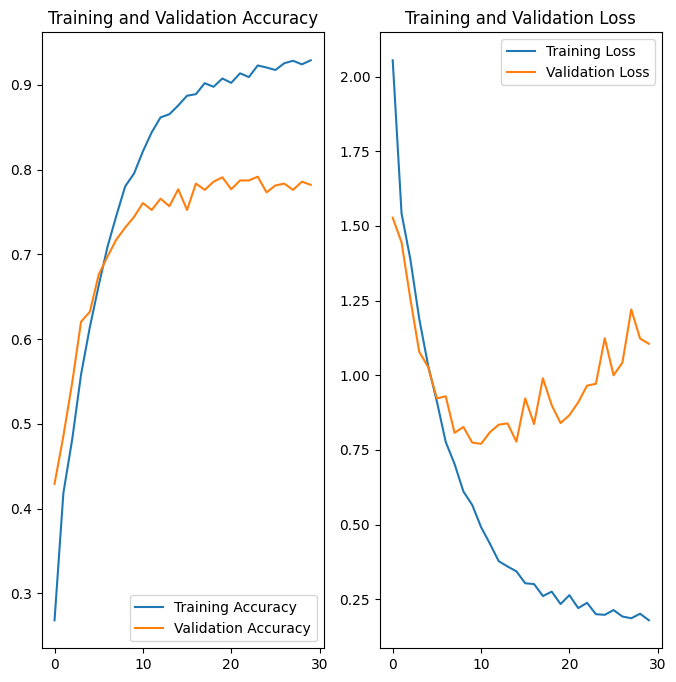

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1.   Training Accuracy is 92%
2.   Validation accuracy is almost 80%
3.   Model accuracy is improved after class rebalance
4.   There are no signs of class imbalance.
5.   There is little overfitting